# Classification on CRAL


Tutorial on how to use CRAL library for classification.

Supported classification models: `DenseNet121` `DenseNet169` `DenseNet201` `InceptionResNetV2` `InceptionV3` `MobileNet` `MobileNetV2` `NASNetLarge` `NASNetMobile` `ResNet50` `ResNet101` `ResNet152` `ResNet50V2` `ResNet101V2` `ResNet152V2` `VGG16` `VGG19` `Xception` `EfficientNetB0` `EfficientNetB1` `EfficientNetB2` `EfficientNetB3` `EfficientNetB4` `EfficientNetB5` `EfficientNetB6` `EfficientNetB7` `DarkNet53`

### 0. **Getting started** 



0.1 Install CRAL

In [ ]:
!pip install cral

0.2 Create an account on [track.segmind.com](https://track.segmind.com/) to track runs

0.3 Configure CRAL


CRAL needs to be configured with `cral config` after installing the library. After running this, you will be asked for the email and password.
Only after this will the tracking of the runs be possible.

In [ ]:
!cral config

### 1. **Experiment tracking** 


This is a mandatory step to be run before training. It provides you statistics on training data and logs all the metrics, losses etc. in an online dashboard making it easier to evaluate the model and compare between different runs, which can help you set the right hyperparameters. 

Generate experiment ID on [track.segmind.com](https://track.segmind.com/) to track your run and refer [here](https://cral.segmind.com/en/api/tracking) for instructions to log custom metadata and artifacts.

In [ ]:
from cral.tracking import set_experiment

set_experiment("your-experiement-id")

###2. **Initiate classification pipeline**


This initiates the classification pipeline. It also creates project related files that are needed later during training and inference.

In [ ]:
from cral.pipeline import ClassificationPipe

pipe= ClassificationPipe()

###3. **Add data**


This parses the dataset once to generate metadata and versions the data. 


If you do not have a seperate validation set, you can divide the training dataset into training and validation using *split* argument. Otherwise, provide the path to the validation images and annotations.



In [ ]:
pipe.add_data(
    train_images_dir= "/path/to/images/folder",
    val_images_dir= None,
    split= 0.2)                                             

###3.1 *Example*

In [ ]:
#Download the dataset
!wget https://segmind-data.s3.ap-south-1.amazonaws.com/edge/data/classification/bikes_persons_dataset.zip

In [ ]:
#unzip the dataset
!unzip ./bikes_persons_dataset.zip

In [ ]:
pipe.add_data(
    train_images_dir= "./bikes_persons_dataset/",
    val_images_dir= None,
    split= 0.2)                                             

###4. **Lock data**

This parses the data and makes Tf-records. Tf-records are part of the [tf.data](https://www.tensorflow.org/guide/data) API which makes the data ingestion into the model faster and hence reduces the training time.



In [ ]:
pipe.lock_data()

###5. **Set algorithm**

### 5.1 MLPConfig


You can change model's head to match custom datasets here. Refer [documentation](https://cral.segmind.com/en/api/data-pipeline#mlpconfig) for the list of accepted arguments.

In [ ]:
from cral.models.classification import MLPConfig

config= MLPConfig(
    height= 512,
    width= 512,
    fully_connected_layer= [512, 512]
    )

###5.2 Instantiate classification model

You can instantiate different classification models here.

You can use any of the supported classification models. You can find the model specific arguments [here](https://cral.segmind.com/api/models/classification). Do not forget to change **network_name** to the network of your choice.

In [ ]:
pipe.set_algo(
    feature_extractor= "network_name",
    config= config,
    weights= "imagenet", 
    preprocessing_fn= None)

###6. **Train**

Now that you have set the model, you can start training.
Using train is very similar to the *fit* function in tensorflow.keras and it accepts many of the same arguments like epochs, batch_size etc. All your loss and metrics will be streamed from here onto [track.segmind.com](http://track.segmind.com/) automatically where you can see and evaluate your model easily.


Refer [here](https://cral.segmind.com/en/api/data-pipeline#train) for a list of accepted arguments.

In [ ]:
pipe.train(
    num_epochs= 20,
    batch_size= 4,
    snapshot_prefix= "test",
    snapshot_path= "snapshots",
    snapshot_every_n= 2)

###7. **Prediction**

After training you can use the model to get predictions on images that maybe or may not be a part of your initial dataset.

Calling `prediction_model` will give you a function that can be used to get predictions on images.

In [ ]:
checkpoint_file= "snapshots/test_final"
prediction_func= pipe.prediction_model(checkpoint_file= checkpoint_file)

img_path= "path/to/test/image"
prediction= prediction_func(img_path)
print(prediction)

###7.1 *Example*

In [ ]:
checkpoint_file= "snapshots/test_final/"
prediction_func= pipe.prediction_model(checkpoint_file= checkpoint_file)

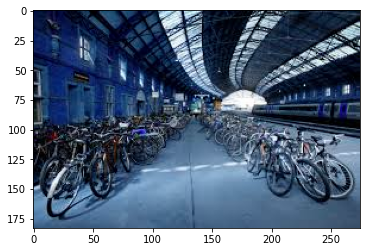

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./test/images.jpeg')
plt.imshow(img)

In [ ]:
img_path= "./test/images.jpeg"
prediction= prediction_func(img_path)
print(prediction)
#prediction format - (predicted label, confidence)

(array([0]), array([0.71183294], dtype=float32))


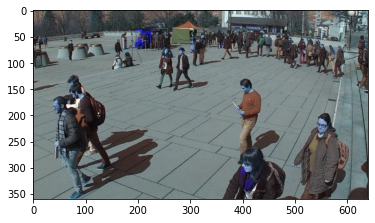

In [ ]:
img = cv2.imread('./test/DGKmE_QUMAApylX.jpg')
plt.imshow(img)

In [ ]:
img_path= "./test/DGKmE_QUMAApylX.jpg"
prediction= prediction_func(img_path)
print(prediction)

(array([1]), array([1.], dtype=float32))


Refer our [documentation](https://cral.segmind.com/en/api/data-pipeline#more-information-examples) for more information and examples.